### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.  

This project aims to discern patterns within the data of past Nobel laureates and draw insights about the Nobel Prize and our world more broadly.

<img src=https://i.imgur.com/36pCx5Q.jpg>




### Import Statements

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [8]:
df = pd.read_csv('nobel_prize_data.csv')

# Data Exploration & Cleaning



In [9]:
df.shape

(962, 16)

In [10]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [11]:
df.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date  \
957    Individual            Michael Houghton  1949-07-02   
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

### Check for Duplicates

In [12]:
df.duplicated().sum()

0

### Check for NaN Values

In [13]:
df.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
df.isna().mean()*100

year                     0.00
category                 0.00
prize                    0.00
motivation               9.15
prize_share              0.00
laureate_type            0.00
full_name                0.00
birth_date               2.91
birth_city               3.22
birth_country            2.91
birth_country_current    2.91
sex                      2.91
organization_name       26.51
organization_city       26.51
organization_country    26.40
ISO                      2.91
dtype: float64

In [15]:
df.organization_country.value_counts()

United States of America    368
United Kingdom               93
Germany                      67
France                       38
Switzerland                  24
Japan                        18
Sweden                       17
Russia                       12
Netherlands                  11
Canada                        9
Denmark                       8
Italy                         6
Austria                       6
Belgium                       5
Israel                        5
Norway                        5
Australia                     5
Argentina                     2
Czech Republic                1
Ireland                       1
Spain                         1
Portugal                      1
Finland                       1
Hungary                       1
India                         1
Tunisia                       1
China                         1
Name: organization_country, dtype: int64

In [16]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [17]:
cols = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']

In [18]:
df.loc[df.birth_date.isna()][cols]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [19]:
df.loc[df.organization_name.isna()].category.value_counts()

Peace         131
Literature    117
Physics         2
Economics       2
Chemistry       2
Medicine        1
Name: category, dtype: int64

#### Converting Year and Birth Date to Datetime

In [20]:
df.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [21]:
df.birth_date = pd.to_datetime(df.birth_date,format='%Y-%m-%d')

#### Adding a Column with the Prize Share as a Percentage

In [22]:
separate = df.prize_share.str.split('/',expand=True)

In [23]:
n = pd.to_numeric(separate[0])

In [24]:
d = pd.to_numeric(separate[1])

In [25]:
df['prize_share_perc'] = n/d
df['prize_share_perc']

0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Name: prize_share_perc, Length: 962, dtype: float64

In [26]:
df.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
prize_share_perc                float64
dtype: object

# Percentage of Male vs. Female Laureates

In [27]:
df_sex = pd.DataFrame(df.sex.value_counts())
df_sex

sex
Male    876
Female   58

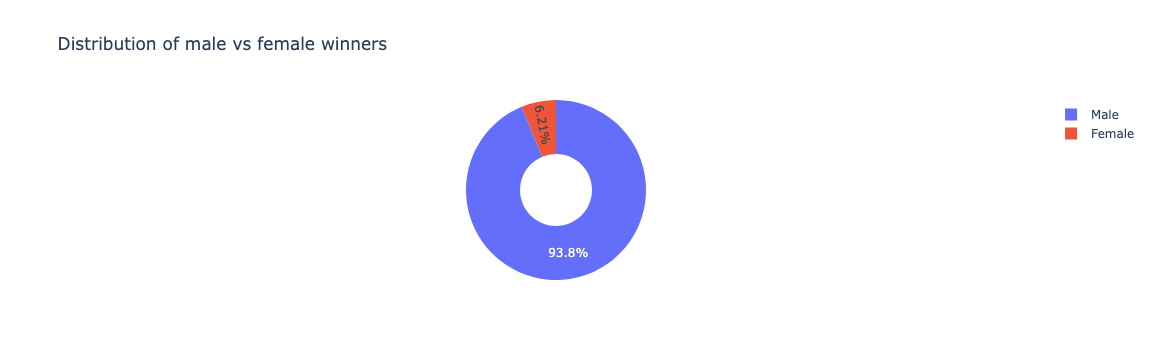

In [29]:
px.pie(df_sex,labels=df_sex.index,title='Distribution of male vs female winners',values='sex',names=df_sex.index,hole=0.4)

# First 3 Women to Win the Nobel Prize?


In [30]:
df[df.sex=='Female'].sort_values(by='year')[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  prize_share_perc  
18                  NaN  POL              0.25  
29                  NaN  CZE              1.00  
51                  NaN  SWE              1.00

## Identifying Nobel laureates who have received the prize more than once. 

In [31]:
df.loc[df.full_name.duplicated()]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
62     Individual                        Marie Curie, née Sklodowska   
215  Organization  Comité international de la Croix Rouge (Intern...   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
62  1867-11-07        Warsaw   Russian Empire (Poland)   
215        NaT           NaN                       NaN   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
62                     Poland  Female   
215                       NaN     NaN   
340  United States of America    Male   
348                       NaN     NaN   
424  United States of America    Male   
505            United Kingdom    Male   
523                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  prize_share_perc  
62                     France  POL              1.00  
215                       NaN  NaN              1.00  
340  United States of America  USA              1.00  
348                       NaN  NaN              0.50  
424  United States of America  USA              0.33  
505            United Kingdom  GBR              0.25  
523                       NaN  NaN              1.00

# Number of Prizes per Category



In [32]:
df.category.unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [33]:
category_df = df.groupby(by='category').count()['prize']
category_df

category
Chemistry     186
Economics      86
Literature    117
Medicine      222
Peace         135
Physics       216
Name: prize, dtype: int64

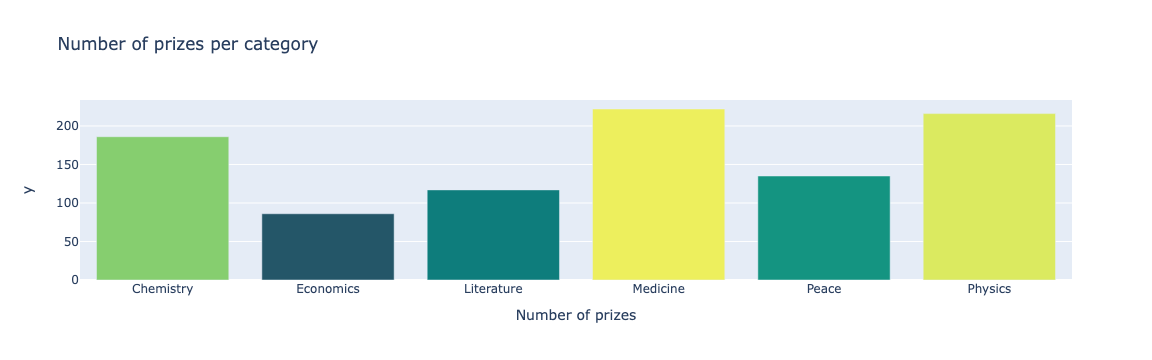

In [34]:
bar = px.bar(data_frame=category_df,x=category_df.index,y=category_df.values,
             color=category_df.values,color_continuous_scale='Aggrnyl',
             title='Number of prizes per category')
bar.update_layout(xaxis_title='Number of prizes',coloraxis_showscale=False)

In [35]:
df[df.category=='Economics'].sort_values('year')[:3]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  prize_share_perc  
393               Netherlands  NLD              0.50  
394                    Norway  NOR              0.50  
402  United States of America  USA              1.00

# Male and Female Winners by Category


In [36]:
gender_df = df.groupby(by=['category','sex'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=False)
gender_df

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

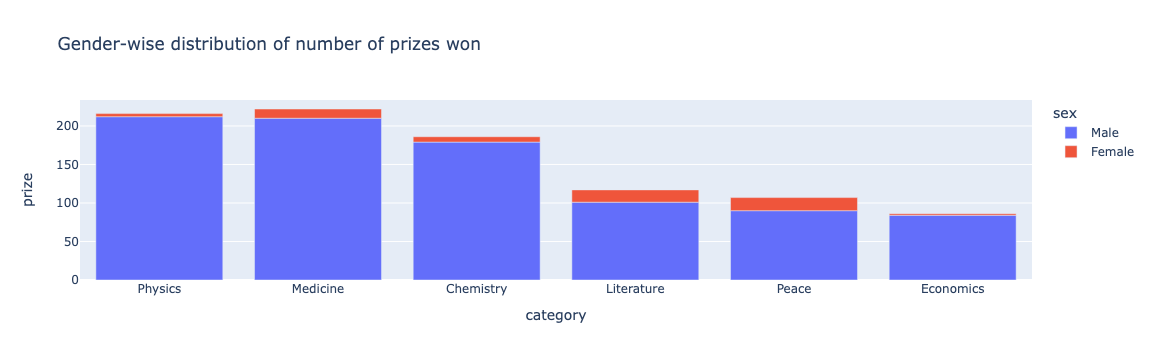

In [37]:
gender_bar = px.bar(data_frame=gender_df,x='category',y='prize',color='sex',
                    title='Gender-wise distribution of number of prizes won')
gender_bar.show()

# Number of Prizes Awarded Over Time




In [38]:
prizes_per_yr = df.groupby(by='year',as_index=False).agg({'prize':pd.Series.count})
x = prizes_per_yr.prize.rolling(window=5).mean()
prizes_per_yr['rolling_avg']=x

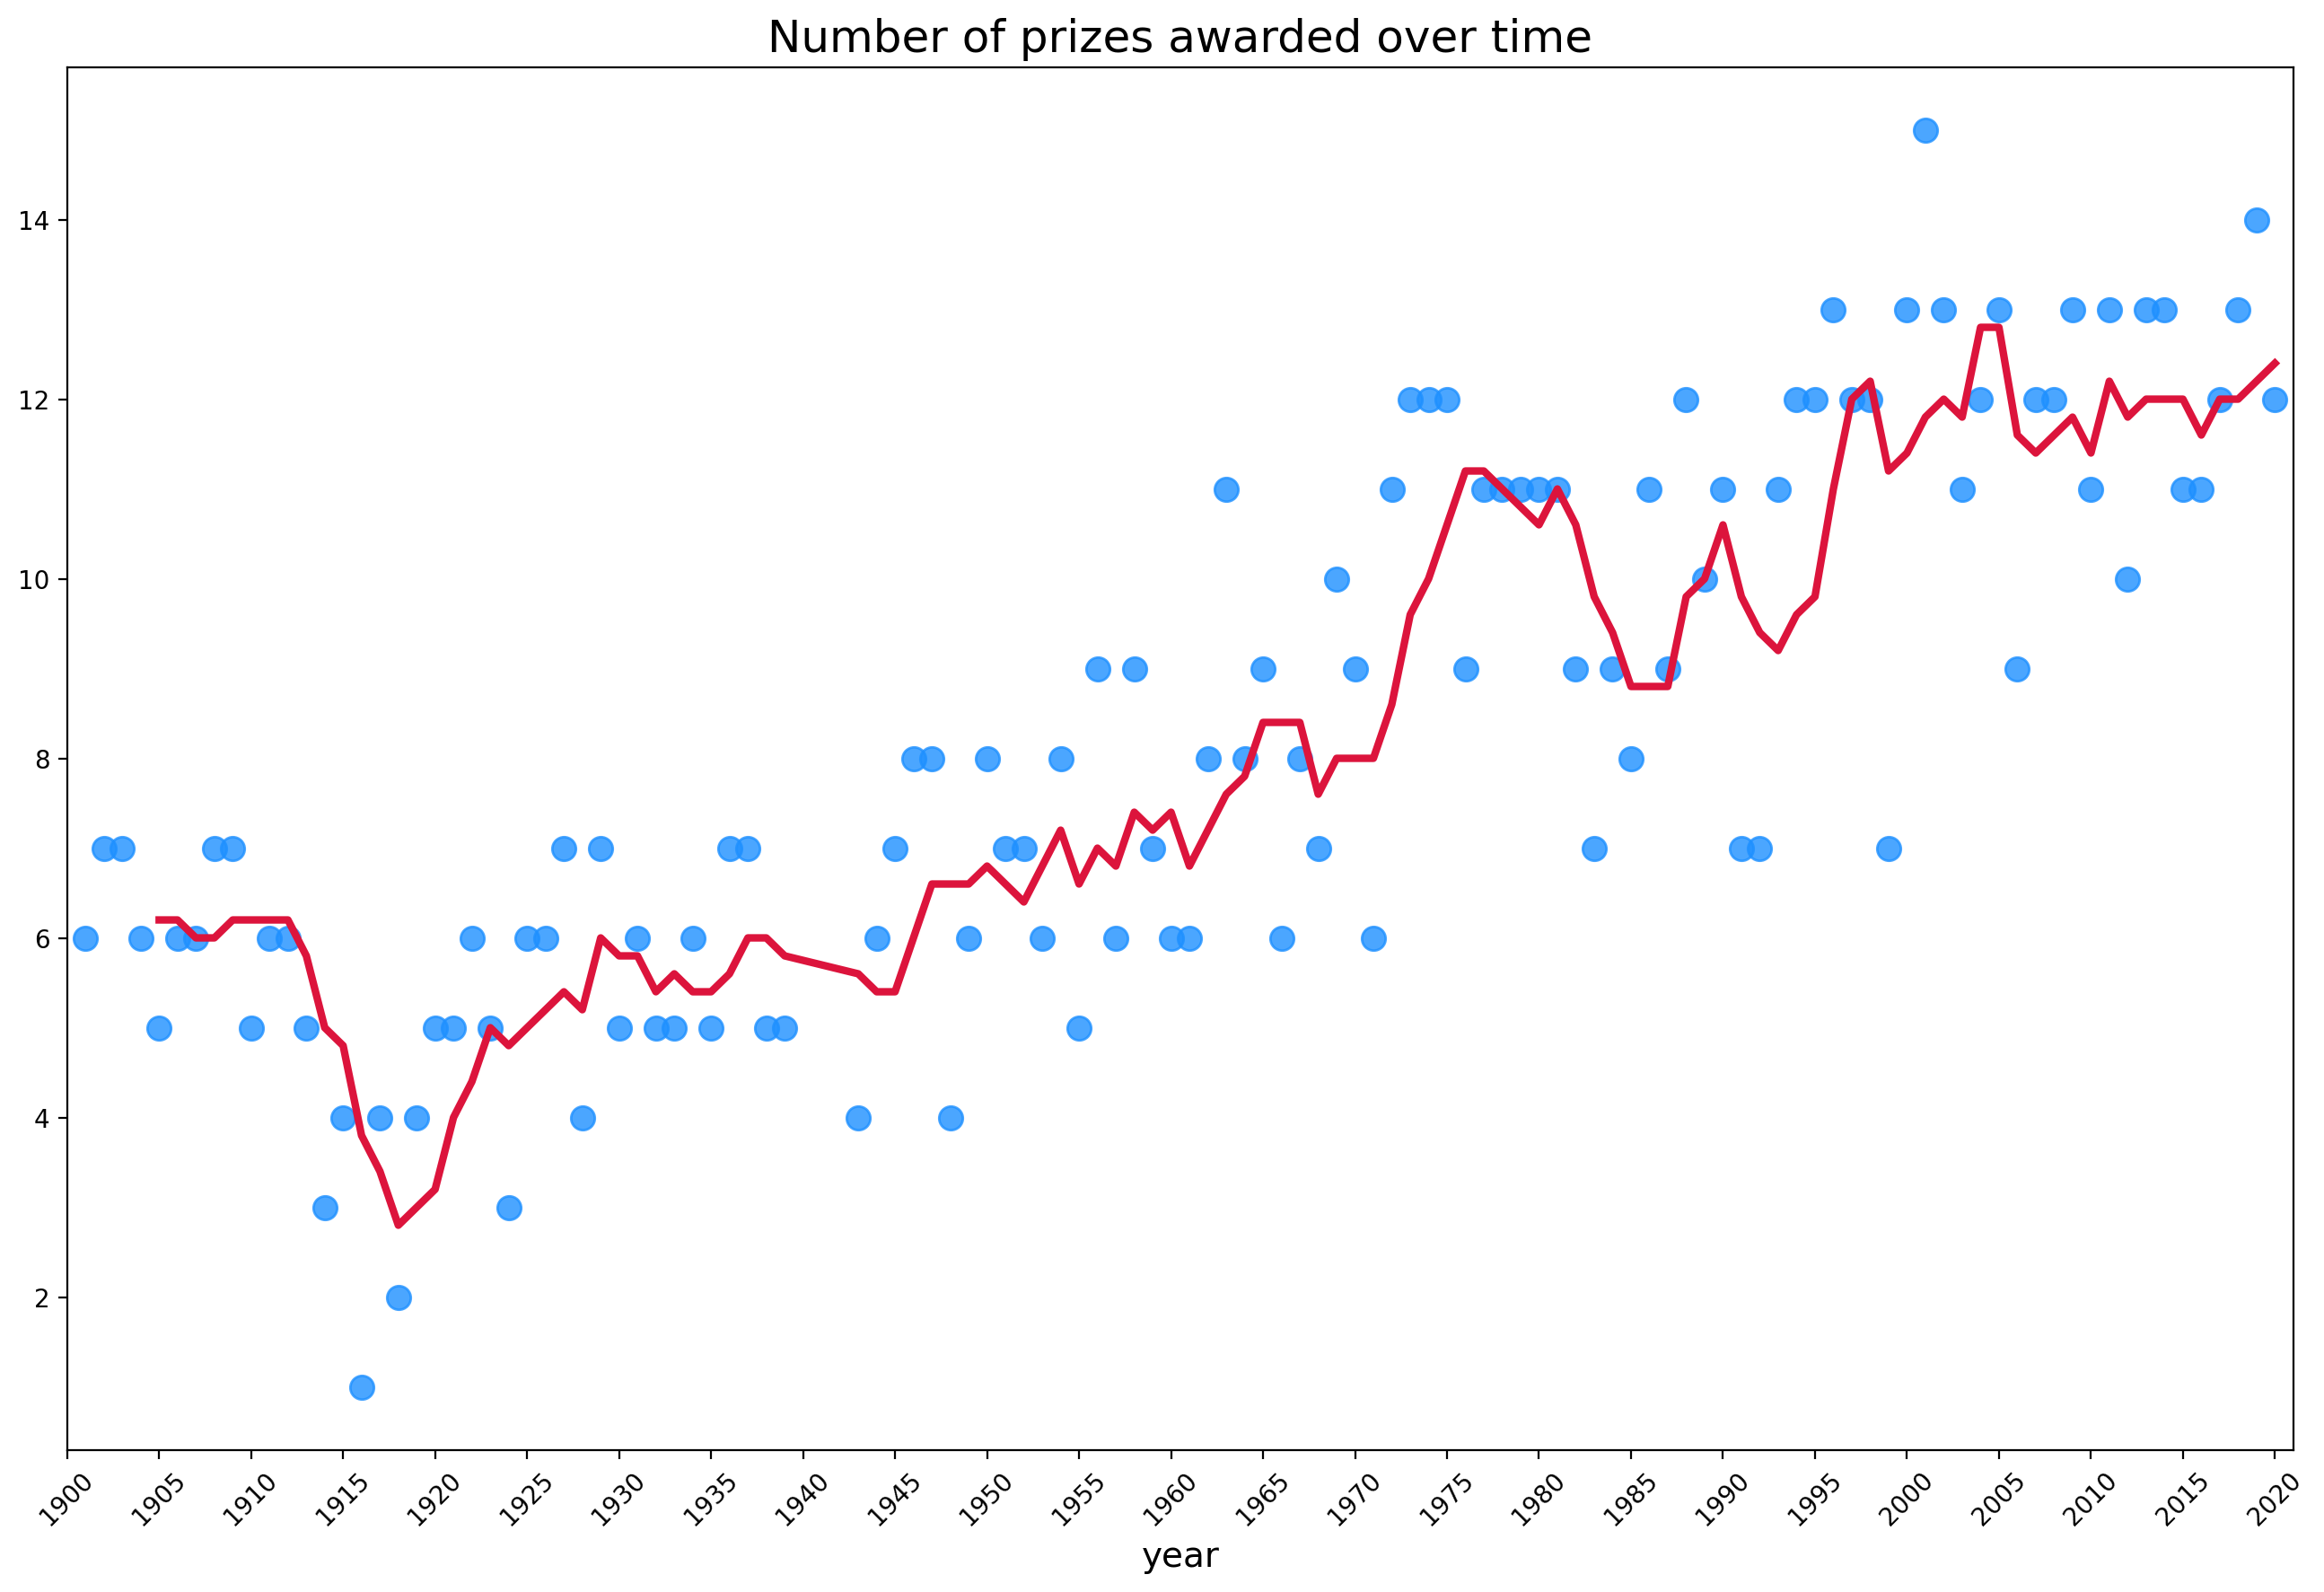

In [40]:
plt.figure(figsize=(16,10),dpi=200)
plt.title('Number of prizes awarded over time',fontsize=18)
plt.xlabel('year',fontsize=14)
plt.xticks(np.arange(1900,2021,5),rotation=45)

ax = plt.gca()
ax.set_xlim(1900,2021)
ax.scatter(x=prizes_per_yr.year,y=prizes_per_yr.prize,c='dodgerblue',alpha=0.8,s=90)
ax.plot(prizes_per_yr.year,prizes_per_yr.rolling_avg,color='crimson',linewidth=3)


# Are More Prizes Shared Than Before?


In [41]:
avg_ps_df = df.groupby(by='year',as_index=False).agg({'prize_share_perc':pd.Series.mean})
avg_ps_df

year  prize_share_perc
0    1901              0.83
1    1902              0.71
2    1903              0.71
3    1904              0.83
4    1905              1.00
..    ...               ...
112  2016              0.55
113  2017              0.50
114  2018              0.46
115  2019              0.43
116  2020              0.50

[117 rows x 2 columns]

In [42]:
y = avg_ps_df.prize_share_perc.rolling(5).mean()
avg_ps_df['rolling_avg'] = y
avg_ps_df

year  prize_share_perc  rolling_avg
0    1901              0.83          NaN
1    1902              0.71          NaN
2    1903              0.71          NaN
3    1904              0.83          NaN
4    1905              1.00         0.82
..    ...               ...          ...
112  2016              0.55         0.52
113  2017              0.50         0.50
114  2018              0.46         0.50
115  2019              0.43         0.50
116  2020              0.50         0.49

[117 rows x 3 columns]

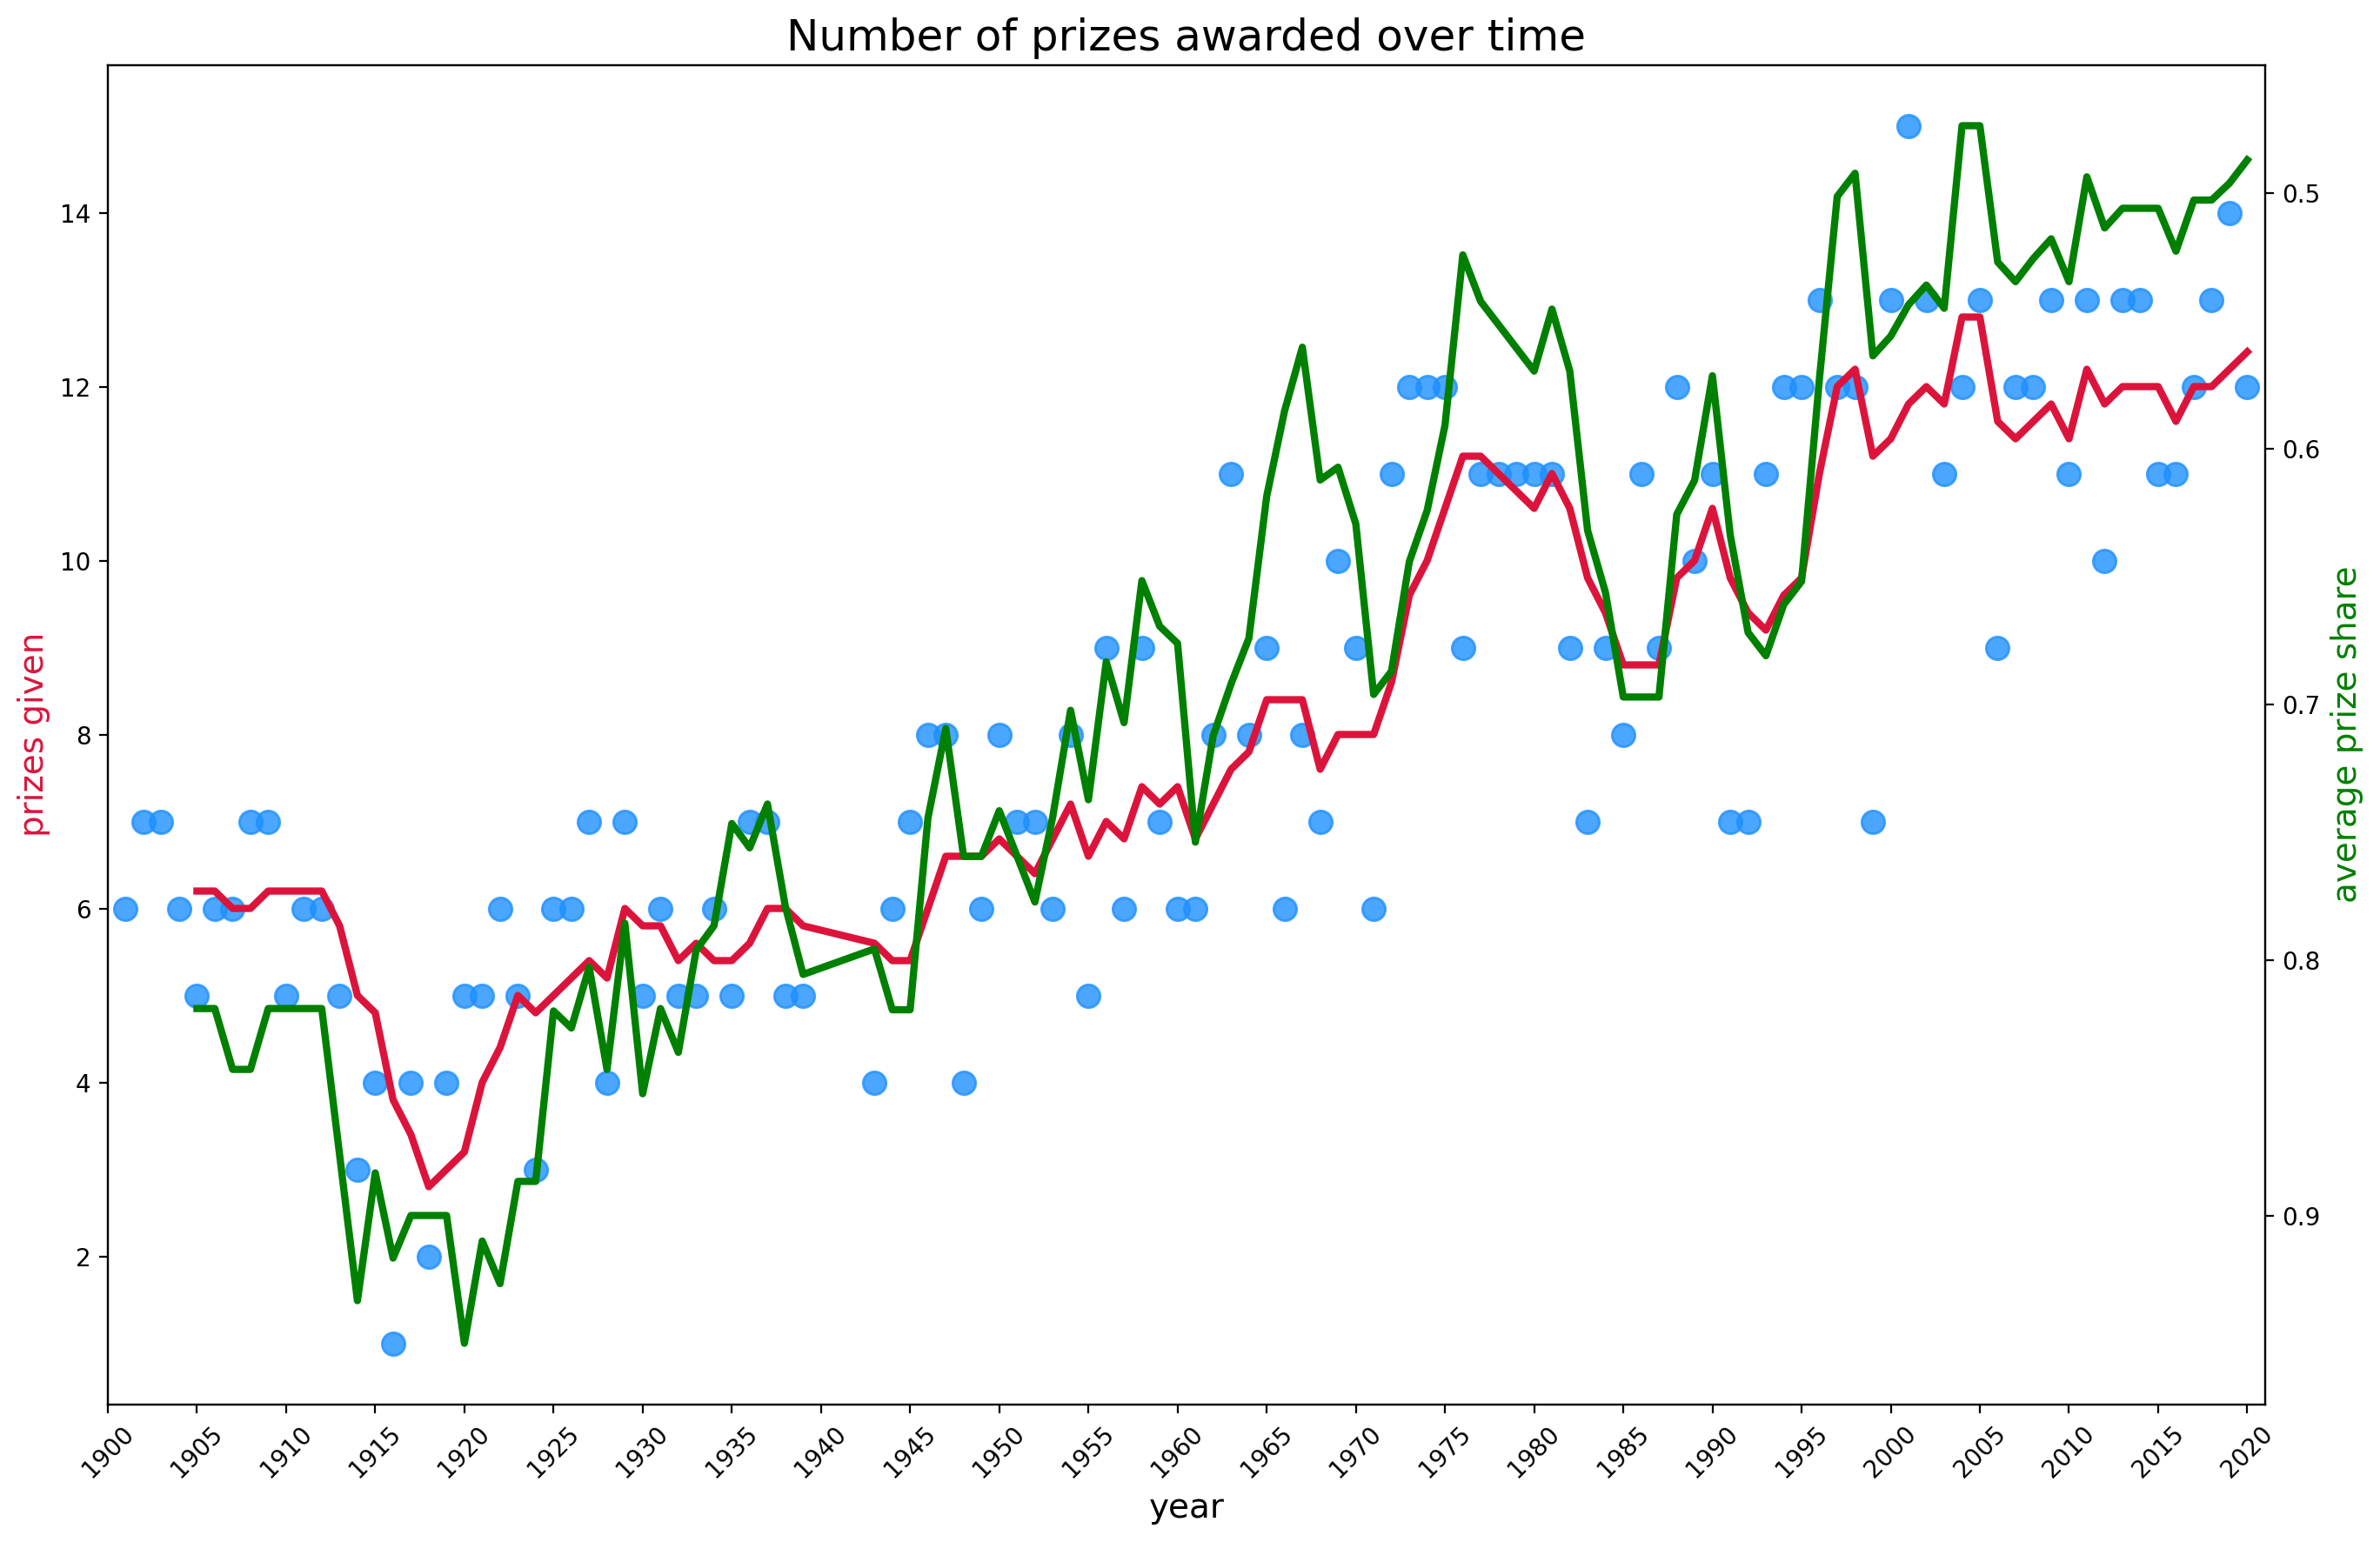

In [43]:
plt.figure(figsize=(16,10),dpi=200)
plt.title('Number of prizes awarded over time',fontsize=18)
plt.xlabel('year',fontsize=14)
plt.xticks(np.arange(1900,2021,5),rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('prizes given',color='crimson',fontsize=14)
ax2.set_ylabel('average prize share',color='green',fontsize=14)
ax2.invert_yaxis()

ax1.set_xlim(1900,2021)
ax1.scatter(x=prizes_per_yr.year,y=prizes_per_yr.prize,c='dodgerblue',alpha=0.8,s=90)
ax1.plot(prizes_per_yr.year,prizes_per_yr.rolling_avg,color='crimson',linewidth=3)

ax2.plot(avg_ps_df.year,avg_ps_df.rolling_avg,color='green',linewidth=3)


# The Countries with the Most Nobel Prizes

In [44]:
top20_countries = df.groupby('birth_country_current',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize')[-20:]
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

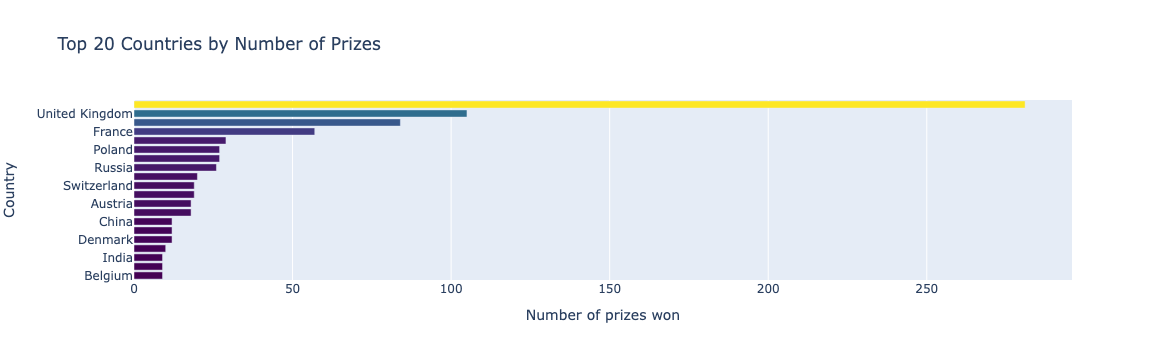

In [45]:
top20_h = px.bar(data_frame=top20_countries,x='prize',y='birth_country_current',orientation='h',color='prize',color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
top20_h.update_layout(yaxis_title='Country',xaxis_title='Number of prizes won',coloraxis_showscale=False)

# Number of Prizes Won by Country


In [46]:
map_df = df.groupby(by=['birth_country_current','ISO'],as_index=False).agg({'prize':pd.Series.count})
map_df

birth_country_current  ISO  prize
0                    Algeria  DZA      2
1                  Argentina  ARG      4
2                  Australia  AUS     10
3                    Austria  AUT     18
4                 Azerbaijan  AZE      1
..                       ...  ...    ...
74  United States of America  USA    281
75                 Venezuela  VEN      1
76                   Vietnam  VNM      1
77                     Yemen  YEM      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

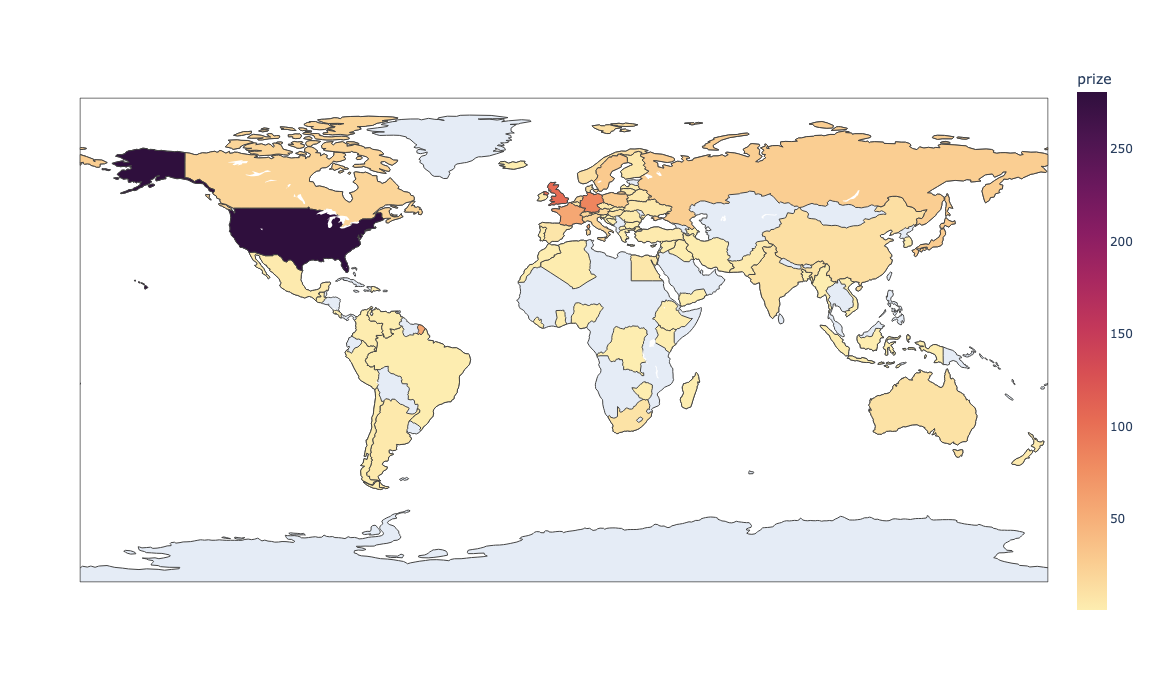

In [47]:
world_map = px.choropleth(data_frame=map_df,locations='ISO',color='prize',
                          hover_name='birth_country_current',color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(width=1000,height=700)

# In Which Categories are the Different Countries Winning Prizes? 


In [48]:
country_cat = df.groupby(by=['birth_country_current','category'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize')
merged_df = pd.merge(country_cat,top20_countries,on='birth_country_current')
merged_df.rename(columns={'prize_x':'cat_prize','prize_y':'ttl_prize'},inplace=True)
merged_df.sort_values(by='ttl_prize',ascending=False,inplace=True)
merged_df

birth_country_current   category  cat_prize  ttl_prize
109  United States of America   Medicine         78        281
108  United States of America    Physics         70        281
107  United States of America  Chemistry         55        281
106  United States of America  Economics         49        281
105  United States of America      Peace         19        281
..                        ...        ...        ...        ...
19                    Hungary   Medicine          2          9
20                    Hungary    Physics          2          9
64                    Belgium   Medicine          3          9
63                    Belgium  Chemistry          1          9
21                    Hungary  Chemistry          3          9

[110 rows x 4 columns]

In [49]:
df.birth_country_current.nunique()

79

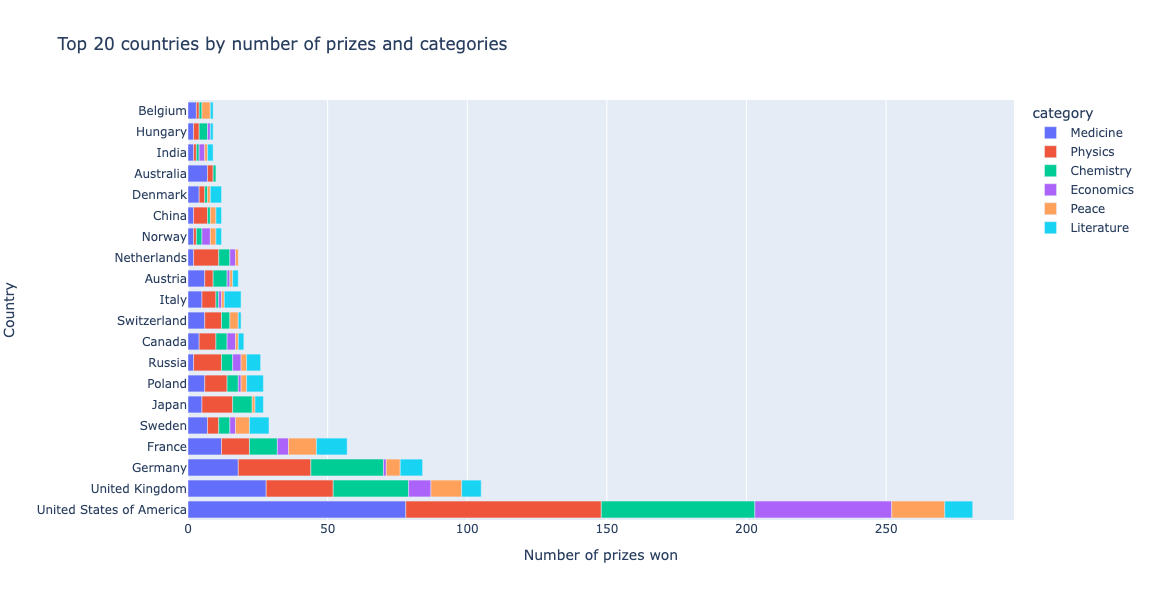

In [50]:
country_stacked_h = px.bar(data_frame=merged_df,x='cat_prize',y='birth_country_current',orientation='h',color='category',color_continuous_scale='Viridis',
               title='Top 20 countries by number of prizes and categories')
country_stacked_h.update_layout(yaxis_title='Country',xaxis_title='Number of prizes won',coloraxis_showscale=False,height=600,width=1000)

### Number of Prizes Won by Each Country Over Time

In [51]:
prize_over_years = df.groupby(by=['birth_country_current','year'],as_index=False).agg({'prize':pd.Series.count})
prize_over_years

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      1
2                   Argentina  1936      1
3                   Argentina  1947      1
4                   Argentina  1980      1
..                        ...   ...    ...
622  United States of America  2020      7
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [52]:
cumulative_df = prize_over_years.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumulative_df.reset_index(inplace=True)
cumulative_df

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

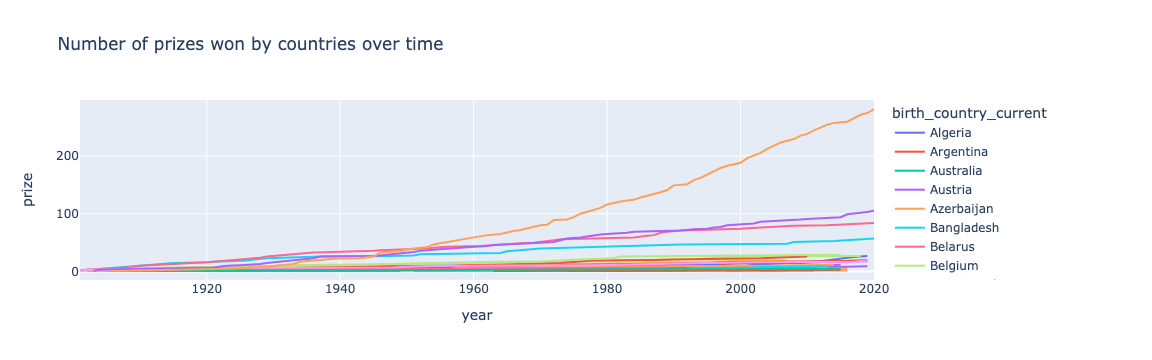

In [53]:
country_over_time = px.line(data_frame=cumulative_df,x='year',y='prize',color='birth_country_current',
                            title='Number of prizes won by countries over time')
country_over_time

# What are the Top Research Organisations?

In [54]:
organization_top20 = df.groupby(by=['organization_name'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=False)[:20]
organization_top20.sort_values(by='prize',inplace=True)
organization_top20

organization_name  prize
192                     University College London      7
163                           Sorbonne University      7
109                             London University      7
67                         Harvard Medical School      7
12                              Bell Laboratories      8
40                             Cornell University      8
258                               Yale University      9
111           MRC Laboratory of Molecular Biology     10
222                          University of Oxford     12
119                           Max-Planck-Institut     13
152                        Rockefeller University     13
146                          Princeton University     15
38                            Columbia University     17
26   California Institute of Technology (Caltech)     17
197                       University of Cambridge     18
198                         University of Chicago     20
117   Massachusetts Institute of Technology (MIT)     21
167                           Stanford University     23
68                             Harvard University     29
196                      University of California     40

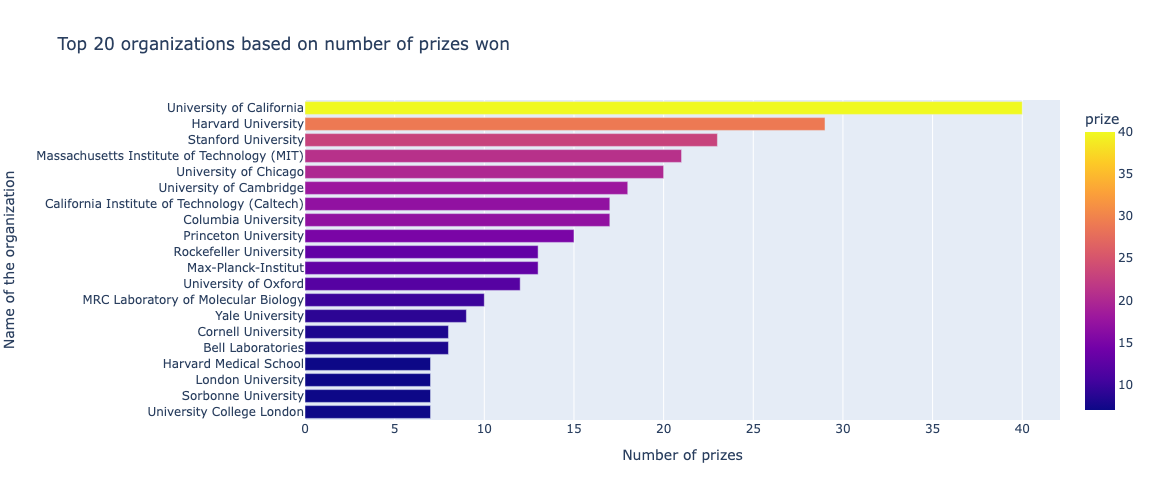

In [55]:
top20_org = px.bar(data_frame=organization_top20,x='prize',y='organization_name',orientation='h',
       title='Top 20 organizations based on number of prizes won',
       color='prize'
      )
top20_org.update_layout(xaxis_title='Number of prizes',
                       yaxis_title='Name of the organization',
                       height=500)
top20_org

# Which Cities Make the Most Discoveries? 


In [56]:
organization_city_top20 = df.groupby(by=['organization_city'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=False)[:20]
organization_city_top20.sort_values(by='prize',inplace=True)
organization_city_top20

organization_city  prize
65          Göttingen      8
78         Ithaca, NY      8
119     New Haven, CT      9
23         Boston, MA      9
110            Munich      9
71         Heidelberg      9
108            Moscow     10
157         Stockholm     10
13             Berlin     12
126            Oxford     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50

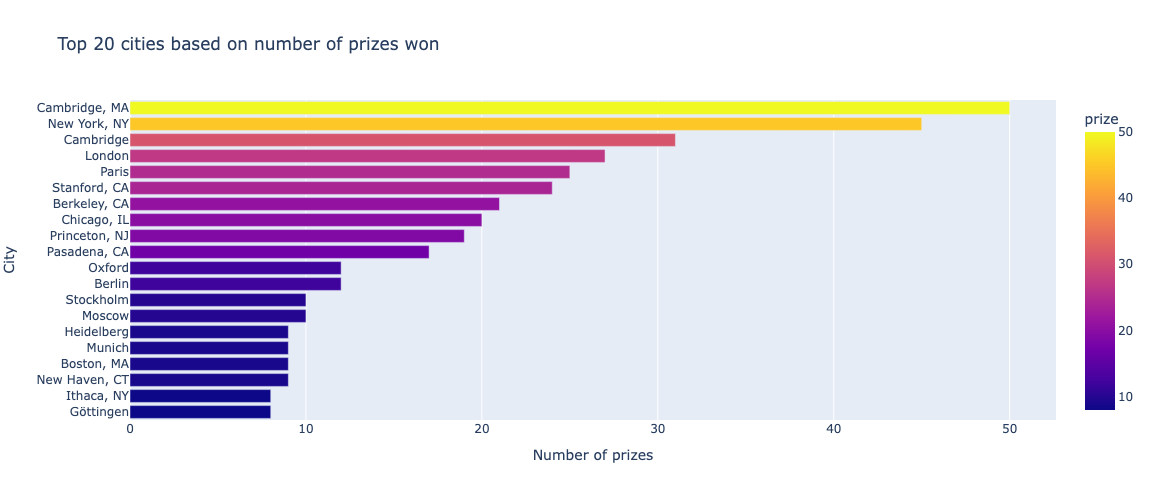

In [57]:
top20_org_city = px.bar(data_frame=organization_city_top20,x='prize',y='organization_city',orientation='h',
       title='Top 20 cities based on number of prizes won',
       color='prize'
      )
top20_org_city.update_layout(xaxis_title='Number of prizes',
                       yaxis_title='City',height=500)
top20_org_city

# Where are Nobel Laureates Born? Charting the Laureate Birth Cities 


In [58]:
birth_city_df = df.groupby(by=['birth_city'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=False)[:20]
birth_city_df.sort_values(by='prize',inplace=True)
birth_city_df

birth_city  prize
92           Cambridge, MA      3
356               Montreal      4
428         Pittsburgh, PA      4
87                   Cairo      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
210                Hamburg      6
515              Stockholm      6
358                 Moscow      7
363                 Munich      7
64              Boston, MA      8
76            Brooklyn, NY      8
590         Washington, DC      8
80                Budapest      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53

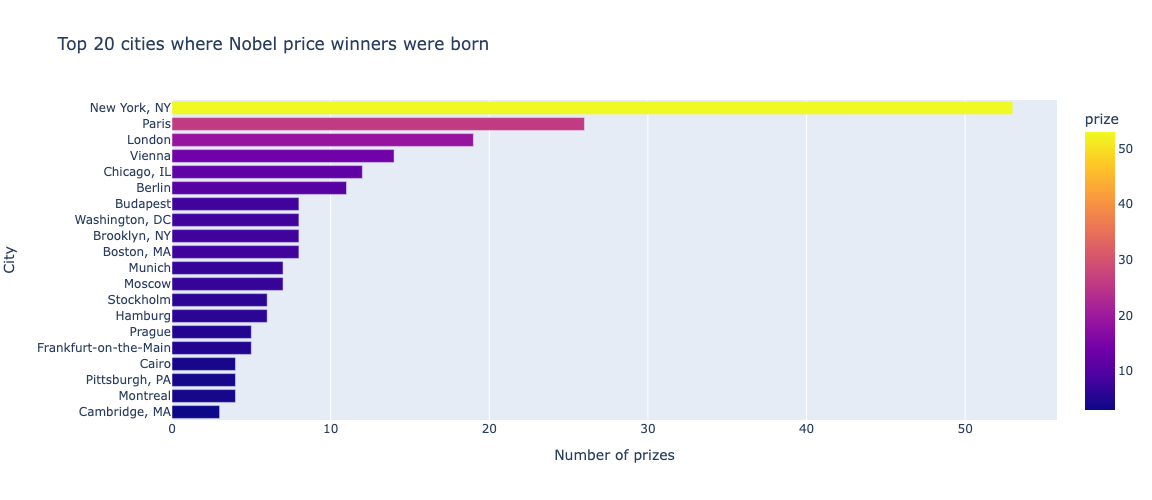

In [59]:
top20_birth_city = px.bar(data_frame=birth_city_df,x='prize',y='birth_city',orientation='h',
       title='Top 20 cities where Nobel price winners were born',
       color='prize',
        color_continuous_scale=px.colors.sequential.Plasma
      )
top20_birth_city.update_layout(xaxis_title='Number of prizes',
                       yaxis_title='City',
                              height=500)
top20_birth_city

# Sunburst Chart: Combining Country, City, and Organisation

In [60]:
org_prize_df = df.groupby(by=['organization_country','organization_city','organization_name',],as_index=False).agg({'prize':pd.Series.count})
org_prize_df

organization_country     organization_city  \
0                   Argentina          Buenos Aires   
1                   Argentina          Buenos Aires   
2                   Australia              Canberra   
3                   Australia             Melbourne   
4                   Australia              Nedlands   
..                        ...                   ...   
286  United States of America    West Lafayette, IN   
287  United States of America        Wilmington, DE   
288  United States of America        Woods Hole, MA   
289  United States of America         Worcester, MA   
290  United States of America  Yorktown Heights, NY   

                                     organization_name  prize  
0                   Institute for Biochemical Research      1  
1    Instituto de Biologia y Medicina Experimental ...      1  
2                       Australian National University      1  
3    Walter and Eliza Hall Institute for Medical Re...      1  
4    NHMRC Helicobacter pylori Research Laboratory,...      1  
..                                                 ...    ...  
286                                  Purdue University      2  
287                                            Du Pont      1  
288                 Marine Biological Laboratory (MBL)      1  
289         University of Massachusetts Medical School      1  
290               IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [61]:
sunburst_chart = px.sunburst(data_frame=org_prize_df,path=['organization_country','organization_city','organization_name'],values='prize',
           title='Where the discoveries take place')
sunburst_chart.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False,
                            height=700,width=700)

# Patterns in the Laureate Age at the Time of the Award


In [62]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'prize_share_perc'],
      dtype='object')

In [63]:
df['winning_age'] = df.year - df.birth_date.dt.year

In [64]:
df.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  prize_share_perc  winning_age  
0            Berlin              Germany  NLD              1.00        49.00  
1               NaN                  NaN  FRA              1.00        62.00  
2           Marburg              Germany  POL              1.00        47.00  
3               NaN                  NaN  FRA              0.50        79.00  
4               NaN                  NaN  CHE              0.50        73.00

### Who were the oldest and youngest winners?


In [65]:
df[df.winning_age == df.winning_age.min()]

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  prize_share_perc  winning_age  
885                  NaN  PAK              0.50        17.00

In [66]:
df[df.winning_age == df.winning_age.max()]

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  prize_share_perc  winning_age  
937  United States of America  DEU              0.33        97.00

In [67]:
df.winning_age.mean().round(2)

59.95

In [68]:
df.winning_age.quantile(0.75)

69.0

### Descriptive Statistics for the Laureate Age at Time of Award

In [69]:
df.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

<Axes: xlabel='winning_age', ylabel='Count'>

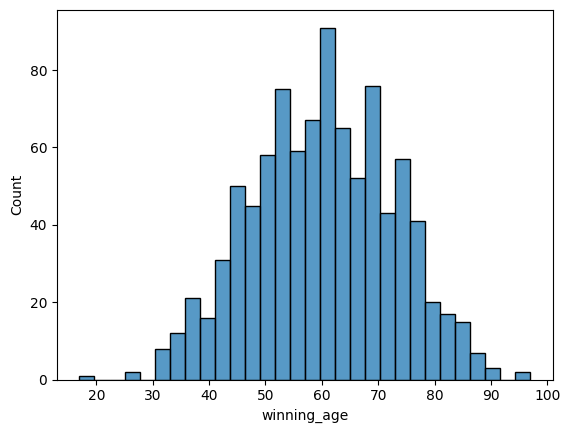

In [70]:
sns.histplot(data=df,x='winning_age',bins=30)

### Age at Time of Award throughout History

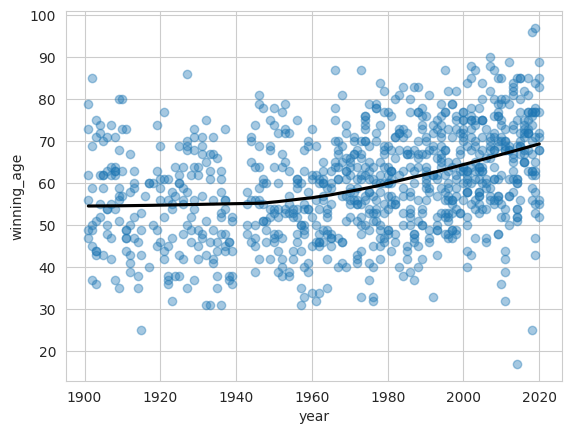

In [71]:
with sns.axes_style('whitegrid'):
    sns.regplot(data=df,x='year',y='winning_age',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})


### Winning Age Across the Nobel Prize Categories


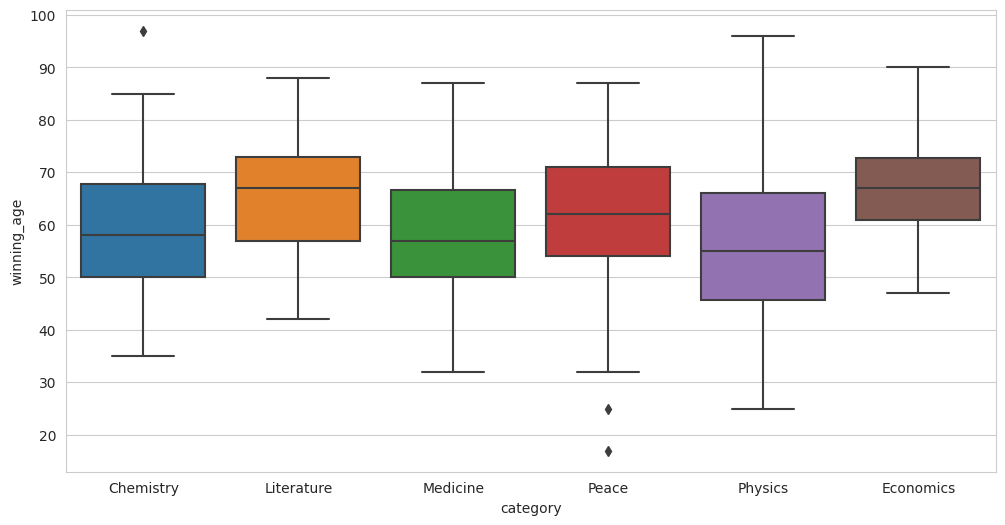

In [72]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df,x='category',y='winning_age')
    

### How does the age of laureates vary by category? 


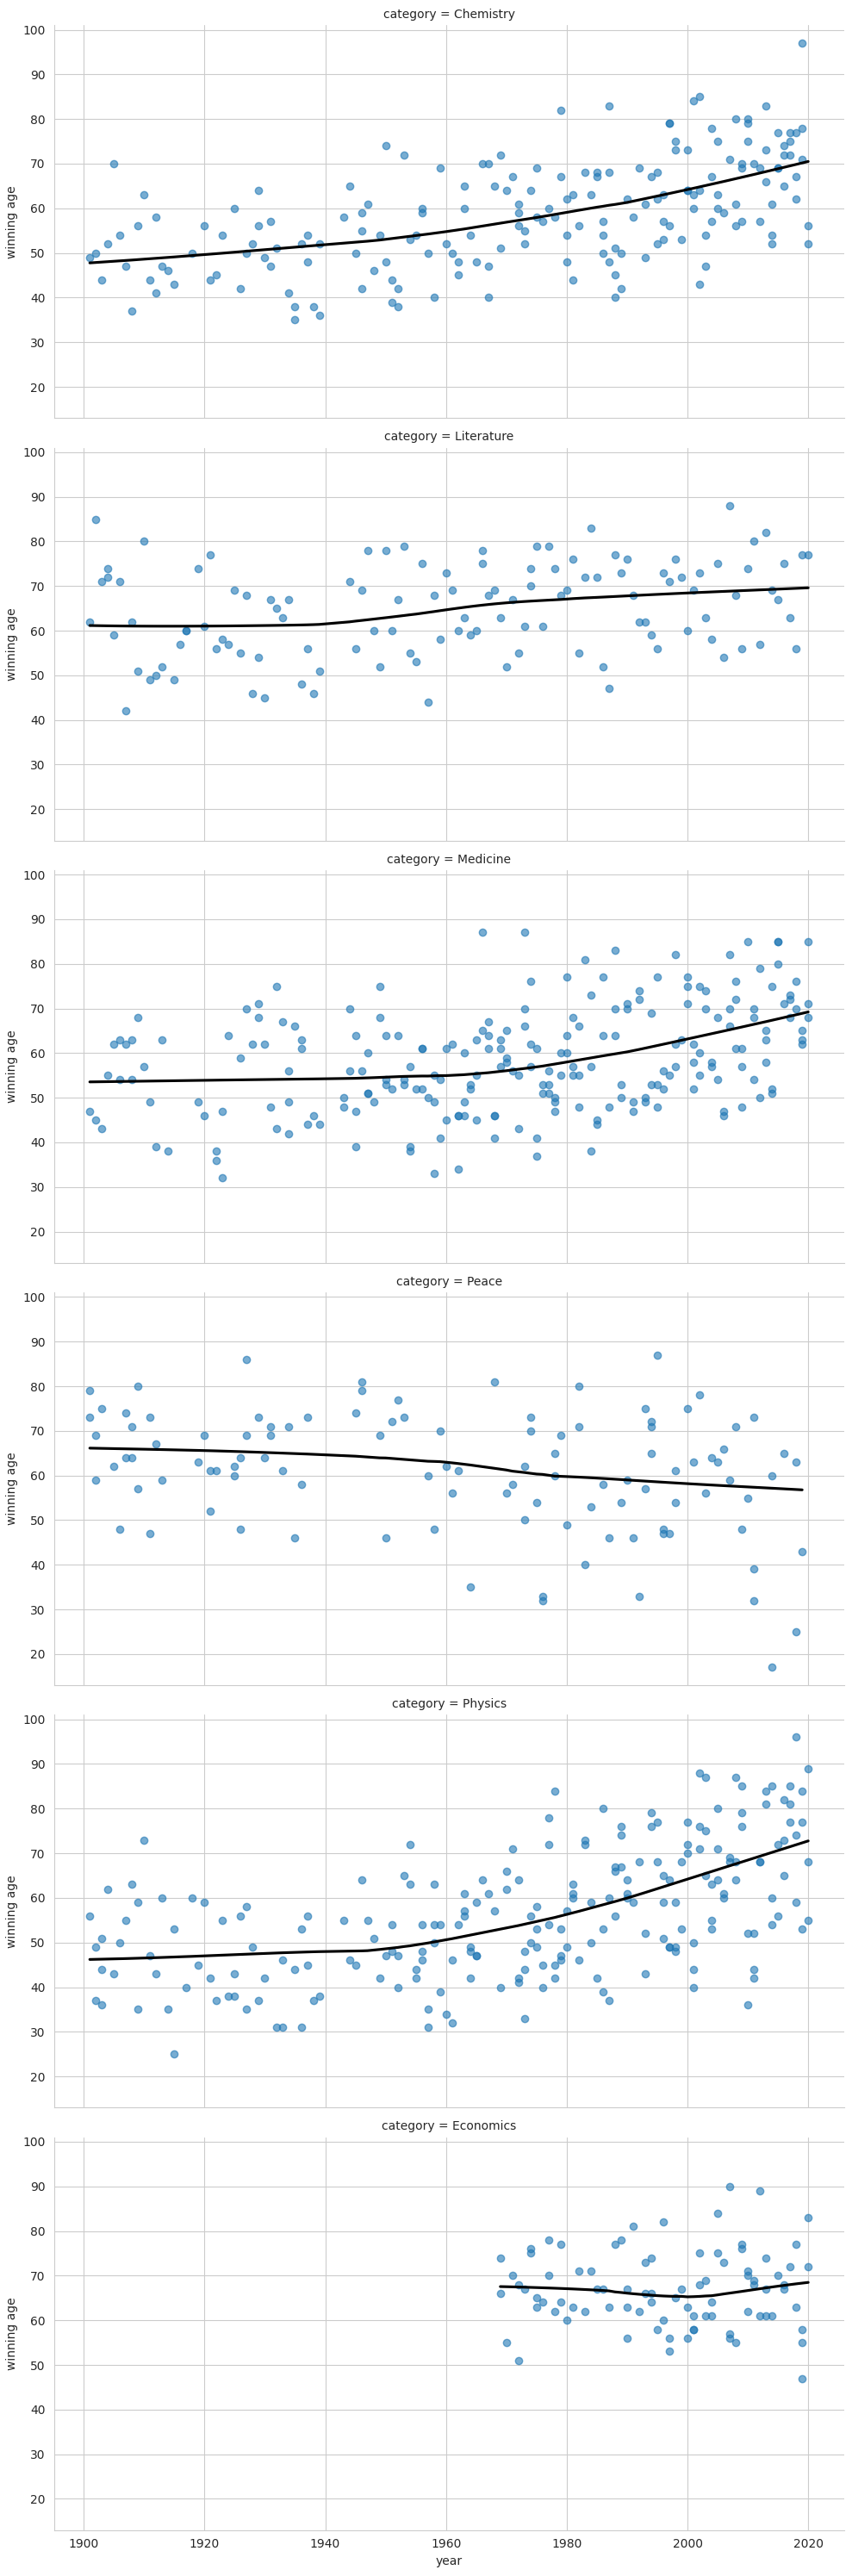

In [73]:
with sns.axes_style('whitegrid'):
    linear_r = sns.lmplot(data=df,x='year',y='winning_age',row='category',lowess=True,
            aspect=2,
            scatter_kws = {'alpha': 0.6},
            line_kws = {'color': 'black'})
    linear_r.set_ylabels('winning age')

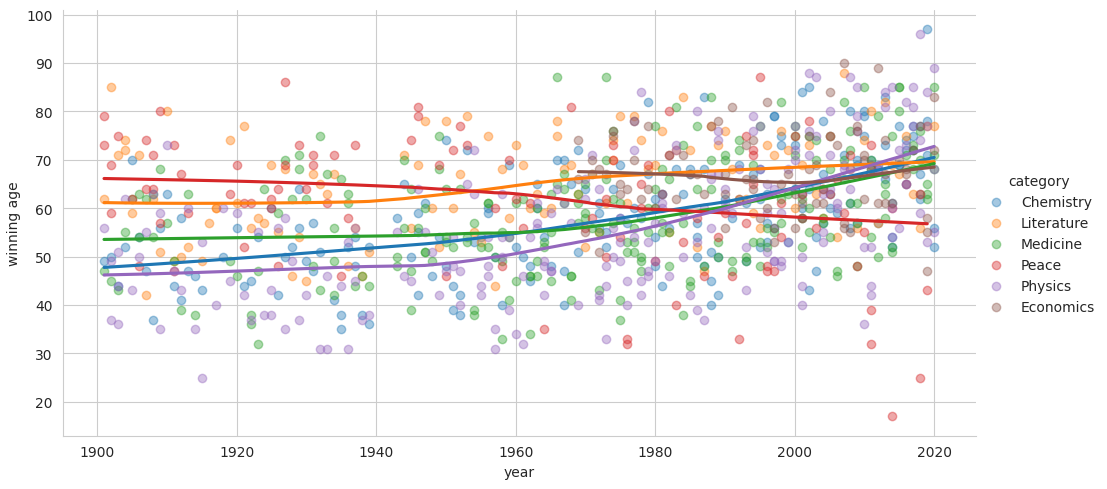

In [74]:
with sns.axes_style('whitegrid'):
    linear_r = sns.lmplot(data=df,x='year',y='winning_age',hue ='category',lowess=True,
            aspect=2,
            scatter_kws = {'alpha': 0.4}
            )
    linear_r.set_ylabels('winning age')